In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

df=pd.read_csv('C:\AI workforce\student performance\student_study_habits.csv')
df.head(10)

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level_Low,participation_level_Medium,internet_access_Yes,parental_education_High School,parental_education_Master's,parental_education_PhD,extracurricular_Yes,part_time_job_Yes
0,0.527230,0.685236,0.993245,0.222222,71.104897,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.421400,0.881883,0.883478,0.555556,62.240021,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.552393,0.220286,0.683469,1.000000,65.268855,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.698283,0.612594,0.520094,0.222222,66.609921,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.405419,0.369871,0.831127,0.333333,58.967484,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
5,0.405422,0.402575,0.760664,0.555556,63.183453,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
6,0.707647,0.381521,0.876671,0.888889,68.478048,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7,0.572350,0.327202,0.816548,0.222222,61.124089,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
8,0.366199,0.509704,0.912362,0.333333,59.598780,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9,0.534871,0.333810,0.545922,0.444444,72.146653,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [83]:
df.columns

Index(['study_hours_per_week', 'sleep_hours_per_day', 'attendance_percentage',
       'assignments_completed', 'final_grade', 'participation_level_Low',
       'participation_level_Medium', 'internet_access_Yes',
       'parental_education_High School', 'parental_education_Master's',
       'parental_education_PhD', 'extracurricular_Yes', 'part_time_job_Yes'],
      dtype='object')

In [84]:
df.shape

(500, 13)

In [85]:
df.dropna()

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level_Low,participation_level_Medium,internet_access_Yes,parental_education_High School,parental_education_Master's,parental_education_PhD,extracurricular_Yes,part_time_job_Yes
0,0.527230,0.685236,0.993245,0.222222,71.104897,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.421400,0.881883,0.883478,0.555556,62.240021,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.552393,0.220286,0.683469,1.000000,65.268855,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.698283,0.612594,0.520094,0.222222,66.609921,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.405419,0.369871,0.831127,0.333333,58.967484,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.534263,0.443780,1.000000,0.222222,67.032033,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
496,0.271570,0.859537,1.000000,0.333333,57.419677,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
497,0.412721,0.628169,0.949083,0.555556,74.950594,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
498,0.298508,0.385764,0.906468,0.333333,55.271003,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [86]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   study_hours_per_week            500 non-null    float64
 1   sleep_hours_per_day             500 non-null    float64
 2   attendance_percentage           500 non-null    float64
 3   assignments_completed           500 non-null    float64
 4   final_grade                     500 non-null    float64
 5   participation_level_Low         500 non-null    float64
 6   participation_level_Medium      500 non-null    float64
 7   internet_access_Yes             500 non-null    float64
 8   parental_education_High School  500 non-null    float64
 9   parental_education_Master's     500 non-null    float64
 10  parental_education_PhD          500 non-null    float64
 11  extracurricular_Yes             500 non-null    float64
 12  part_time_job_Yes               500 

None

In [87]:
df.describe()

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level_Low,participation_level_Medium,internet_access_Yes,parental_education_High School,parental_education_Master's,parental_education_PhD,extracurricular_Yes,part_time_job_Yes
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,0.445603,0.506387,0.684110,0.533556,63.753071,0.202000,0.484000,0.890000,0.268000,0.228000,0.07800,0.618000,0.316000
std,0.162325,0.194923,0.214918,0.276109,7.114183,0.401894,0.500244,0.313203,0.443361,0.419963,0.26844,0.486363,0.465379
min,0.000000,0.000000,0.000000,0.000000,40.200403,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.327727,0.380942,0.530386,0.333333,58.813933,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.446577,0.505706,0.697383,0.555556,63.822553,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,0.550575,0.630248,0.844194,0.777778,68.588277,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,92.007807,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


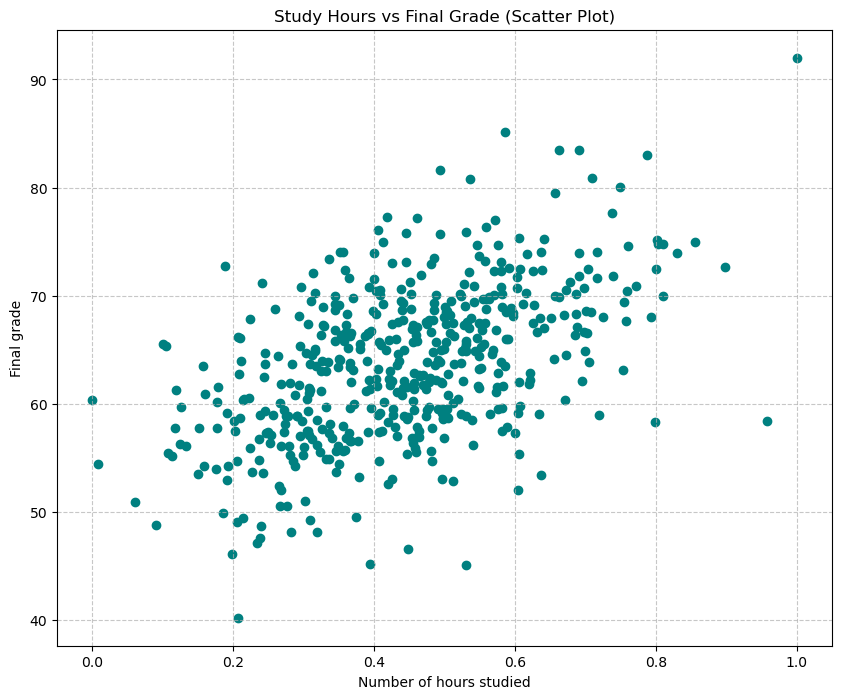

In [88]:
plt.figure(figsize=(10, 8))
plt.scatter(df['study_hours_per_week'], df['final_grade'], color="teal")
plt.xlabel('Number of hours studied')
plt.ylabel('Final grade')
plt.title('Study Hours vs Final Grade (Scatter Plot)')
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

In [89]:
print(df.columns)


Index(['study_hours_per_week', 'sleep_hours_per_day', 'attendance_percentage',
       'assignments_completed', 'final_grade', 'participation_level_Low',
       'participation_level_Medium', 'internet_access_Yes',
       'parental_education_High School', 'parental_education_Master's',
       'parental_education_PhD', 'extracurricular_Yes', 'part_time_job_Yes'],
      dtype='object')


In [90]:
df["performance"] = df["final_grade"].apply(lambda x: "Pass" if x >= 50 else "Fail")
df.head(10)

,study_hours_per_week,sleep_hours_per_day,attendance_percentage,assignments_completed,final_grade,participation_level_Low,participation_level_Medium,internet_access_Yes,parental_education_High School,parental_education_Master's,parental_education_PhD,extracurricular_Yes,part_time_job_Yes,performance
0,0.527230,0.685236,0.993245,0.222222,71.104897,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,Pass
1,0.421400,0.881883,0.883478,0.555556,62.240021,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Pass
2,0.552393,0.220286,0.683469,1.000000,65.268855,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,Pass
3,0.698283,0.612594,0.520094,0.222222,66.609921,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Pass
4,0.405419,0.369871,0.831127,0.333333,58.967484,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,Pass
5,0.405422,0.402575,0.760664,0.555556,63.183453,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,Pass
6,0.707647,0.381521,0.876671,0.888889,68.478048,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,Pass
7,0.572350,0.327202,0.816548,0.222222,61.124089,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,Pass
8,0.366199,0.509704,0.912362,0.333333,59.598780,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Pass
9,0.534871,0.333810,0.545922,0.444444,72.146653,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Pass


In [91]:
X = df[["study_hours_per_week", "attendance_percentage",
        "assignments_completed", "sleep_hours_per_day",
        "parental_education_High School",
        "parental_education_Master's",
        "parental_education_PhD"]]
y = df["performance"]

In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [93]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

In [94]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

In [95]:
print("Model Accuracy Comparison")
print(f"Random Forest Accuracy: {acc_rf:.3f}")
print(f"Naïve Bayes Accuracy: {acc_nb:.3f}")

Model Accuracy Comparison
Random Forest Accuracy: 0.970
Naïve Bayes Accuracy: 0.310


In [96]:
new_student = pd.DataFrame([{
    "study_hours_per_week": 15,
    "attendance_percentage": 90,
    "assignments_completed": 10,
    "sleep_hours_per_day": 8,
    "parental_education_High School": 0,
    "parental_education_Master's": 0,
    "parental_education_PhD": 0  
}])

In [97]:
rf_prediction = rf.predict(new_student)[0]
nb_prediction = nb.predict(new_student)[0]

In [98]:
print("\nPrediction for New Student (study=15, attendance=90, assignments=10, sleep=8:")
print(f"Random Forest → {rf_prediction}")
print(f"Naïve Bayes   → {nb_prediction}")


Prediction for New Student (study=15, attendance=90, assignments=10, sleep=8:
Random Forest → Pass
Naïve Bayes   → Fail
